In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#for the stelar disk
def I_d_I(x,z,R,R_d=2.0e03,z_p=0.,z_0=0.3e03,z_1=1.0e03,alpha_1=0.5):
    E = np.exp(-abs(z)/z_0) - alpha_1*np.exp(-abs(z)/z_0) + (alpha_1*z_0/z_1)*np.exp(-abs(z)/z_1)
    d = np.sqrt((z-z_p)**2. + (R_d*x+R)**2.) + np.sqrt((z-z_p)**2. + (R_d*x - R)**2.)
    den_1 = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x +R))**2.+1.)
    num = R*E*x**2.*kn(0,x)
    t1 = num/den_1
    den_2 = d*np.sqrt(d**2. -4.*R_d**2.* x**2.)*np.sqrt(((z-z_p)/(R_d*x -R))**2.+1.)
    t2 = num/den_2
    return t1-t2

In [3]:
def Vc_ad_d_I(l):
    Integral_d = []
    for i in range (0,len(l)):
        integrando = lambda z,x: I_d_I(x,z,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda x: 0.1, lambda x: 10)[0]
        Integral_d.append(result)
    return np.array(Integral_d)

In [9]:
G = 4.302e-3
z_0 = 0.3e03
r_b2_I = 4.0e06
r_b2_II = 10.24e06
Sigma_d_I = 1905.*0.75
Sigma_d_II = 536.*0.75
C_d = 4.*G/z_0
print C
np.sqrt(C_d*r_b2_I*Sigma_d_I)

5.736e-05


572.5490372011816

In [5]:
#for the interstelar medium
def func(u,beta,y,R_m=4.0e03,R_d=2.0e03):
    exp = np.exp(-y*np.cos(u)*np.cosh(beta) - R_m/(2.*R_d*y*np.cos(u)*np.cosh(beta)))
    t1 = R_m/(2.*R_d*y**2.*np.cos(u)**2.*np.cosh(beta)**2.) -1.
    t2 = np.cos(2.*u) + 1.
    f = t1*t2*exp
    return f

In [6]:
def Vc_ad_ISM_I(l):
    Integral_ISM = []
    for i in range (0,len(l)):
        integrando = lambda beta,u: func(u,beta,l[i])
        result = integrate.dblquad(integrando,0,np.inf,lambda u: 0, lambda u: np.pi/2.)[0]
        Integral_ISM.append(result)
    return np.array(l**2.*Integral_ISM)

In [7]:
Sigma_g_I = 1905.*0.25
Sigma_g_II = 536.*0.25
R_d_I = 2.0e03
R_d_II = 3.2e03
C_ISM_I = 4.*G*Sigma_g_I*R_d_I/np.pi
C_ISM_II = 4.*G*Sigma_g_II*R_d_II/np.pi

In [11]:
R = np.linspace(0.1,15.,100)
y = np.linspace(0.1,15.,100)

In [12]:
Vc_SD_ISM = C_d*r_b2_I*Sigma_d_I*Vc_ad_d_I(R) + C_ISM_I*Vc_ad_ISM_I(y)
print Vc_SD_ISM

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed

[ 5.61396666e+47  4.94373542e+20  1.00559270e+14  9.72911069e+10
  1.94634306e+09  1.77096855e+08  1.21173365e+42  6.51930314e+36
  5.81641402e+32  9.93882427e+66  6.36860790e+60  4.72545433e+55
  2.27207545e+51  4.69562214e+47  3.09465523e+44  5.20779144e+41
  1.89002845e+39  1.29814626e+37  1.56723860e+16  2.94626141e+15
  7.64881406e+31  1.66026250e+14  4.77519460e+13  1.52704773e+13
  5.35498080e+12  2.03064702e+12  8.16594487e+11  3.33913595e+11
  1.21140119e+11  1.08215120e+10 -6.37583357e+10 -1.33340796e+11
 -2.16283421e+11 -3.28258354e+11 -4.87251327e+11 -7.17278986e+11
 -1.05234411e+12 -1.54157515e+12 -2.25644085e+12 -3.30114077e+12
 -4.82769245e+12 -7.05789397e+12 -1.03153179e+13 -1.50720458e+13
 -2.20160553e+13 -3.21509654e+13 -4.69394773e+13 -6.85132815e+13
 -9.99784023e+13 -1.45859647e+14 -3.88451810e+14 -5.16741447e+14
 -7.78006984e+14 -1.10575015e+15 -1.61668209e+16 -6.20588832e+16
 -3.46646926e+16 -5.07519879e+16 -3.09708729e+18 -4.23367377e+18
 -1.59290925e+17 -7.91225

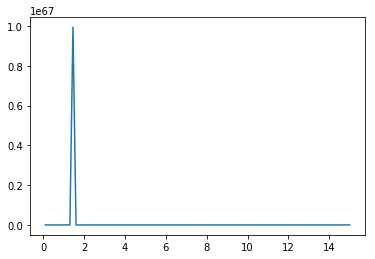

In [13]:
plt.plot(R,Vc_SD_ISM)